In [1]:
import os
import cv2
import numpy as np

def load_training_data(directory):
    # Initialize lists for frames and labels
    frames = []
    labels = []

    # Iterate over the files in the directory
    for filename in os.listdir(directory):
        # Get the full file path
        file_path = os.path.join(directory, filename)

        # Load the frame using OpenCV
        frame = cv2.imread(file_path)

        # Preprocess the frame if needed

        # Append the frame to the frames list
        frames.append(frame)

        # Extract the label from the filename (assuming the filename contains the label information)
        label = filename.split("_")[0]  # Extract the label from the filename based on the naming convention
        labels.append(label)

    # Convert frames and labels to numpy arrays
    frames = np.array(frames)
    labels = np.array(labels)

    return frames, labels

# Directory path containing the training data
training_data_directory = "C:\\Users\\VE\\UCSD_Anomaly_Dataset.v1p2"

# Load training data
training_frames, training_labels = load_training_data(training_data_directory)

# Print the shape of the training frames and labels
print("Training Frames Shape:", training_frames.shape)
print("Training Labels Shape:", training_labels.shape)

Training Frames Shape: (5,)
Training Labels Shape: (5,)


In [2]:
def extract_features(frames):
    features = []
    
    # Convert frames to grayscale
    gray_frames = [cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) for frame in frames]
    
    # Calculate optical flow for consecutive frames
    for i in range(len(frames) - 1):
        prev_frame = gray_frames[i]
        next_frame = gray_frames[i + 1]
        
        # Compute optical flow using Lucas-Kanade method
        flow = cv2.calcOpticalFlowFarneback(prev_frame, next_frame, None, 0.5, 3, 15, 3, 5, 1.2, 0)
        
        # Extract relevant features from the optical flow
        # Example: Compute the mean and standard deviation of the flow vectors
        mean_flow = np.mean(flow)
        std_flow = np.std(flow)
        
        # Append the extracted features to the list
        features.append([mean_flow, std_flow])
    
    return np.array(features)

In [3]:
import numpy as np
from sklearn.mixture import GaussianMixture

def train_mdt_model(features, num_components):
    # Convert the list of features into a 3D numpy array
    features_array = np.array(features)
    
    # Get the shape of the array
    num_samples, num_frames, num_features = features_array.shape
    
    # Reshape the array to have two dimensions
    features_2d = features_array.reshape(num_samples * num_frames, num_features)
    
    # Train a Gaussian Mixture Model (GMM) on the extracted features
    gmm = GaussianMixture(n_components=num_components)
    gmm.fit(features_2d)
    
    return gmm

In [4]:
import os
import tifffile

# Specify the directory path containing the frames
directories =[
    r"C:\Users\VE\UCSD_Anomaly_Dataset.v1p2\UCSDped1\Train\Train001",
    r"C:\Users\VE\UCSD_Anomaly_Dataset.v1p2\UCSDped1\Train\Train002",
    r"C:\Users\VE\UCSD_Anomaly_Dataset.v1p2\UCSDped1\Train\Train003",
    r"C:\Users\VE\UCSD_Anomaly_Dataset.v1p2\UCSDped1\Train\Train004",
    r"C:\Users\VE\UCSD_Anomaly_Dataset.v1p2\UCSDped1\Train\Train005",
    r"C:\Users\VE\UCSD_Anomaly_Dataset.v1p2\UCSDped1\Train\Train006",
    r"C:\Users\VE\UCSD_Anomaly_Dataset.v1p2\UCSDped1\Train\Train007",
    r"C:\Users\VE\UCSD_Anomaly_Dataset.v1p2\UCSDped1\Train\Train008",
    r"C:\Users\VE\UCSD_Anomaly_Dataset.v1p2\UCSDped1\Train\Train009",
    r"C:\Users\VE\UCSD_Anomaly_Dataset.v1p2\UCSDped1\Train\Train010",
    r"C:\Users\VE\UCSD_Anomaly_Dataset.v1p2\UCSDped1\Train\Train011",
    r"C:\Users\VE\UCSD_Anomaly_Dataset.v1p2\UCSDped1\Train\Train012",
    r"C:\Users\VE\UCSD_Anomaly_Dataset.v1p2\UCSDped1\Train\Train013",
    r"C:\Users\VE\UCSD_Anomaly_Dataset.v1p2\UCSDped1\Train\Train014",
    r"C:\Users\VE\UCSD_Anomaly_Dataset.v1p2\UCSDped1\Train\Train015",
    r"C:\Users\VE\UCSD_Anomaly_Dataset.v1p2\UCSDped1\Train\Train016",
    r"C:\Users\VE\UCSD_Anomaly_Dataset.v1p2\UCSDped1\Train\Train017",
    r"C:\Users\VE\UCSD_Anomaly_Dataset.v1p2\UCSDped1\Train\Train018",
    r"C:\Users\VE\UCSD_Anomaly_Dataset.v1p2\UCSDped1\Train\Train019",
    r"C:\Users\VE\UCSD_Anomaly_Dataset.v1p2\UCSDped1\Train\Train020",
    #r"C:\Users\VE\UCSD_Anomaly_Dataset.v1p2\UCSDped1\Train\Train021",
    #r"C:\Users\VE\UCSD_Anomaly_Dataset.v1p2\UCSDped1\Train\Train023",
    #r"C:\Users\VE\UCSD_Anomaly_Dataset.v1p2\UCSDped1\Train\Train023",
    #r"C:\Users\VE\UCSD_Anomaly_Dataset.v1p2\UCSDped1\Train\Train024",
    #r"C:\Users\VE\UCSD_Anomaly_Dataset.v1p2\UCSDped1\Train\Train025",
    #r"C:\Users\VE\UCSD_Anomaly_Dataset.v1p2\UCSDped1\Train\Train026",
    #r"C:\Users\VE\UCSD_Anomaly_Dataset.v1p2\UCSDped1\Train\Train027",
    #r"C:\Users\VE\UCSD_Anomaly_Dataset.v1p2\UCSDped1\Train\Train028",
    #r"C:\Users\VE\UCSD_Anomaly_Dataset.v1p2\UCSDped1\Train\Train029",
    #r"C:\Users\VE\UCSD_Anomaly_Dataset.v1p2\UCSDped1\Train\Train030",
    #r"C:\Users\VE\UCSD_Anomaly_Dataset.v1p2\UCSDped1\Train\Train031",
    #r"C:\Users\VE\UCSD_Anomaly_Dataset.v1p2\UCSDped1\Train\Train032",
    #r"C:\Users\VE\UCSD_Anomaly_Dataset.v1p2\UCSDped1\Train\Train033",
    #r"C:\Users\VE\UCSD_Anomaly_Dataset.v1p2\UCSDped1\Train\Train034",
    
]
# Initialize an empty list to store the frames
frames = []

# Iterate over the directories
for directory_path in directories:
    # Iterate over the files in the directory
    for filename in os.listdir(directory_path):
        file_path = os.path.join(directory_path, filename)

        # Check if the file is a .tif image
        if filename.endswith(".tif"):
            # Read the frame using tifffile
            frame = tifffile.imread(file_path)

            # Append the frame to the list
            frames.append(frame)

# Print the number of frames loaded
print("Number of frames:", len(frames))

Number of frames: 4000


In [5]:
num_components = 5  # Number of components in the MDT model
features = []

In [6]:
def extract_features(frames):
    features = []

    # Calculate optical flow for consecutive frames
    for i in range(len(frames) - 1):
        frame1 = frames[i]
        frame2 = frames[i + 1]

        # Calculate optical flow
        flow = cv2.calcOpticalFlowFarneback(frame1, frame2, None, 0.5, 3, 15, 3, 5, 1.2, 0)

        # Flatten the flow matrix and append it to the features
        flow_flat = flow.reshape(-1)
        features.append(flow_flat)

    return features

In [7]:
# Create an empty list to store the features
features = []

# Iterate over the frames and extract features
for frame in frames:
    # "Preprocess frame if needed"
    # Extract features from the frame
    frame_features = extract_features(frame)
    features.append(frame_features)

In [8]:
features = np.array(features)

In [9]:
frame_features

[array([ 0.00000000e+00, -1.70326414e-18,  0.00000000e+00, -2.52977629e-19,
         0.00000000e+00,  1.10530417e-18,  0.00000000e+00,  4.75986556e-19,
         0.00000000e+00, -2.09332985e-18,  0.00000000e+00, -3.40509912e-18,
         0.00000000e+00, -3.19067137e-18,  0.00000000e+00, -3.92947352e-18,
         0.00000000e+00, -4.13699742e-18,  0.00000000e+00, -4.58553404e-18,
         0.00000000e+00, -4.95821489e-18,  0.00000000e+00, -3.17813607e-18,
         0.00000000e+00,  1.42451513e-18,  0.00000000e+00,  3.38518537e-18,
         0.00000000e+00,  1.63527248e-18,  0.00000000e+00, -4.91809539e-19,
         0.00000000e+00, -1.99653234e-18,  0.00000000e+00, -2.46403415e-18,
         0.00000000e+00, -1.29669081e-18,  0.00000000e+00,  8.55809695e-19,
         0.00000000e+00,  1.93849735e-18,  0.00000000e+00,  2.87072287e-18,
         0.00000000e+00,  4.26266151e-19,  0.00000000e+00,  1.75887123e-19,
         0.00000000e+00,  1.92407629e-18,  0.00000000e+00,  1.03483603e-18,
         0.0

In [10]:
import numpy as np

# Convert the list of features into a 3D numpy array
features_array = np.array(features)

# Get the shape of the array
num_samples, num_frames, num_features = features_array.shape

# Reshape the array to have two dimensions
features_2d = features_array.reshape(num_samples * num_frames, num_features)

In [11]:
mdt_model = train_mdt_model(features, num_components)

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


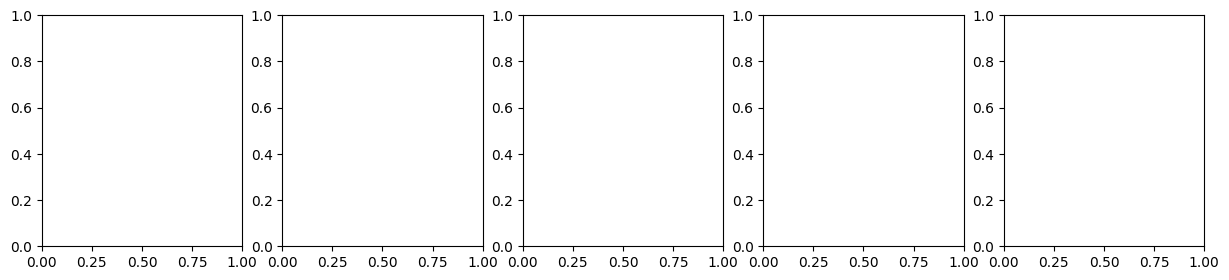

In [12]:
import matplotlib.pyplot as plt

# Function to display frames and their corresponding labels
def display_frames(frames, labels, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))

    for i in range(num_samples):
        # Display the frame
        axes[i].imshow(cv2.cvtColor(frames[i], cv2.COLOR_BGR2RGB))
        axes[i].axis('off')
        axes[i].set_title(f"Label: {labels[i]}")

    plt.show()

# Display the first 5 frames along with their labels
display_frames(training_frames, training_labels)


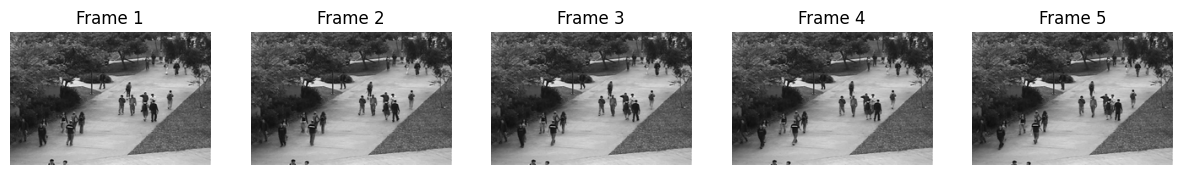

In [13]:
import matplotlib.pyplot as plt

# Function to display frames
def display_frames(frames, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))

    for i in range(num_samples):
        # Display the frame
        axes[i].imshow(frames[i], cmap='gray')  # Assuming frames are grayscale
        axes[i].axis('off')
        axes[i].set_title(f"Frame {i + 1}")

    plt.show()

# Display the first 5 frames
display_frames(frames)


In [ ]:
import cv2
import numpy as np

# Load the new frame using OpenCV
new_frame = cv2.imread("C:/Users/VE/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test034/0.tif")

# Check if the new frame is loaded successfully
if new_frame is None:
    print("Failed to load the new frame.")
    exit()

# Extract features from the new frame
new_features = extract_features([new_frame])  # Pass the new frame as a list to the extract_features function

# Check if the features are extracted successfully
if len(new_features) == 0:
    print("Failed to extract features from the new frame.")
    exit()

# Convert the features to a numpy array
new_features = np.array(new_features)

# Reshape the features for prediction
new_observation = new_features.reshape(1, -1)

# Compute anomaly score for the new observation
anomaly_score = compute_anomaly_score(new_observation, mdt_model)